## Electoral College Math

Goal: A not-very-rigorous exploration of the mathematics behind the electoral college, specifically with regards to how the relative weight of each vote by state affects the collective voting power of each racial demographic

In [239]:
import pandas
import matplotlib.pyplot as plt
# original size = [6.0, 4.0]
plt.rcParams['figure.figsize'] = [12,8]
pandas.options.display.float_format = '{:20,.5f}'.format

In [282]:
# data loading

election_data = pandas.read_csv("demography_data_wikipedia.csv",thousands=',') # data taken from https://en.wikipedia.org/wiki/Demography_of_the_United_States#Race
election_data.set_index("State or District", inplace = True)
election_data.drop("Puerto Rico", inplace=True)
races = ['White',
       'Black or African American', 'American Indian and Alaska Native',
       'Asian', 'Native Hawaiian and Other Pacific Islander',
       'Some other race', 'Two or more races']
race_data = election_data[races]/ 100

state_populations = election_data[["Population"]]

electoral_college_data = pandas.read_csv("electoral_college_votes_by_state.csv")
electoral_college_data.set_index("State or District", inplace=True)
race_data

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Two or more races
State or District,,,,,,,
Alabama,0.68800,0.26400,0.00500,0.01200,0.00100,0.01300,0.01700
Alaska,0.66000,0.03400,0.13800,0.05900,0.01200,0.01300,0.08400
Arizona,0.78400,0.04200,0.04400,0.03000,0.00200,0.06500,0.03200
Arkansas,0.78000,0.15500,0.00600,0.01400,0.00200,0.02100,0.02100
California,0.61800,0.05900,0.00700,0.13700,0.00400,0.12900,0.04500
Colorado,0.84200,0.04000,0.00900,0.02900,0.00100,0.04300,0.03500
Connecticut,0.77300,0.10300,0.00200,0.04200,0.00000,0.05100,0.02800
Delaware,0.69400,0.21600,0.00300,0.03600,0.00000,0.02300,0.02700
District of Columbia,0.40200,0.48900,0.00300,0.03700,0.00000,0.04200,0.02700


In [421]:
electoral_college_data.sort_values(["electoral votes"])

,electoral votes
State or District,
Wyoming,3
Alaska,3
North Dakota,3
Vermont,3
Montana,3
Delaware,3
District of Columbia,3
South Dakota,3
New Hampshire,4


#### Racial Demographics by State

State or District
Alabama                             1.00000
Alaska                              1.00000
Arizona                             0.99900
Arkansas                            0.99900
California                          0.99900
Colorado                            0.99900
Connecticut                         0.99900
Delaware                            0.99900
District of Columbia                1.00000
Florida                             1.00000
Georgia                             0.99900
Hawaii                              1.00000
Idaho                               1.00000
Illinois                            0.99800
Indiana                             1.00000
Iowa                                1.00100
Kansas                              1.00000
Kentucky                            1.00000
Louisiana                           1.00000
Maine                               1.00000
Maryland                            1.00000
Massachusetts                       1.00000
Michigan      

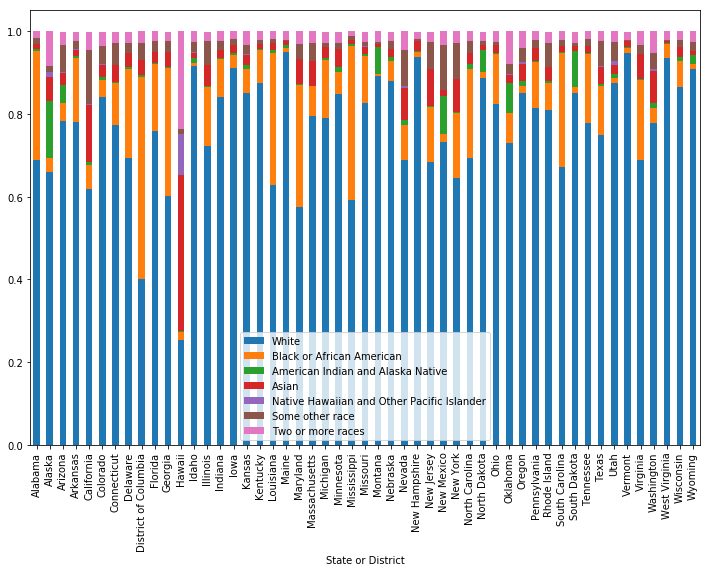

In [283]:
race_data.plot.bar(stacked=True)
print(race_data.sum(axis=1))

### Total Percentage by State

Ideally, this value would add to 100% for all states. It does not, which suggests some degree of data loss via rounding. This very likely has some effect on the end-result, to what degree is unknown. 

In [284]:
race_data.sum(numeric_only=True,axis=1)

State or District
Alabama                             1.00000
Alaska                              1.00000
Arizona                             0.99900
Arkansas                            0.99900
California                          0.99900
Colorado                            0.99900
Connecticut                         0.99900
Delaware                            0.99900
District of Columbia                1.00000
Florida                             1.00000
Georgia                             0.99900
Hawaii                              1.00000
Idaho                               1.00000
Illinois                            0.99800
Indiana                             1.00000
Iowa                                1.00100
Kansas                              1.00000
Kentucky                            1.00000
Louisiana                           1.00000
Maine                               1.00000
Maryland                            1.00000
Massachusetts                       1.00000
Michigan      

## Relative Vote Weight

The house of representatives is capped at 435 members, and each state is guaranteed at least one representative. This means that states are guaranteed to control at least 1/435 of the house, even if their population is much less than 1/435 of the total US population. With smaller states overrepresented relative to their populations, larger states are therefore *underrepresented* in the house, relative to their populations. 

For the presidential election, each state receives a number of electoral college votes equal to the sum of their senators and representatives. Small states are, by design, "overrepresented" in the senate, and, (presumably) by accident, overrepresented in the house, resulting in overrepresentation in the electoral college. 

The chart below quantifies that overrepresentation. 

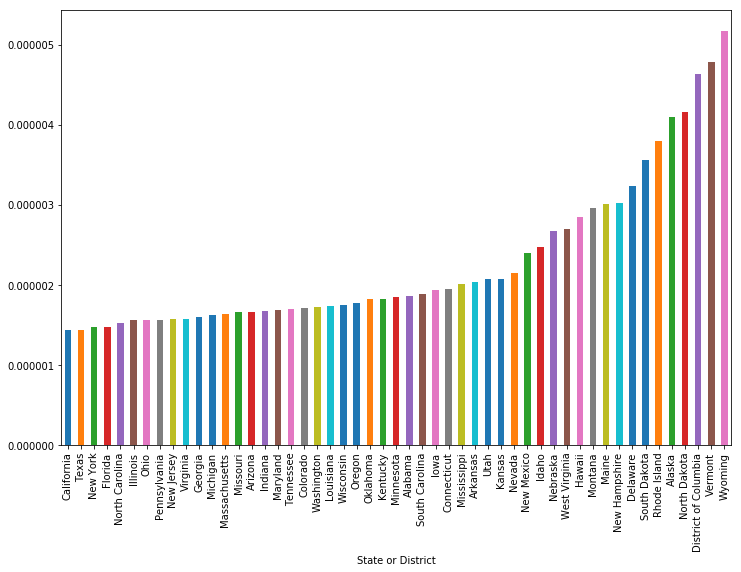

In [285]:
vote_weight = state_populations.join(electoral_college_data).dropna()
vote_weight["electoral votes per person"] = vote_weight["electoral votes"].truediv(vote_weight["Population"])
vote_weight.sort_values(["electoral votes per person"], inplace=True)
vote_weight["electoral votes per person"].plot.bar()

The disparity here is significant, with individual votes in Wyoming counting some three times that of votes in California

In [286]:
state_population_by_race = race_data.multiply(state_populations["Population"], axis="index")

state_populations.join(state_population_by_race.sum(axis=1).rename(""))

,Population,
State or District,,
Alabama,4830620,"4,830,620.00000"
Alaska,733375,"733,375.00000"
Arizona,6641928,"6,635,286.07200"
Arkansas,2958208,"2,955,249.79200"
California,38421464,"38,383,042.53600"
Colorado,5278906,"5,273,627.09400"
Connecticut,3593222,"3,589,628.77800"
Delaware,926454,"925,527.54600"
District of Columbia,647484,"647,484.00000"


If you multiply the percentage of each racial demographic by the total population, you should receive the total population for each demographic. You'd expect that adding those totals up again would result in the exact same value. However, this appears not to be the case. As noted above, this is because the percentages do not actually add to 100% for every state. 

In [342]:
electoral_votes_by_race_and_state = state_population_by_race.multiply(vote_weight["electoral votes per person"], axis=0).dropna()
actual_electoral_votes_by_race = electoral_votes_by_race_and_state.sum(axis=0).to_frame("actual")
actual_electoral_votes_by_race

,actual
White,399.25300
Black or African American,66.23100
American Indian and Alaska Native,5.07100
Asian,26.40600
Native Hawaiian and Other Pacific Islander,1.05800
Some other race,23.57300
Two or more races,16.31400


In [343]:
total_population = state_populations["Population"].sum()
total_population 

316515021

In [344]:
total_percentage_by_race = (state_population_by_race.sum() / total_population).to_frame("percentage")
total_percentage_by_race

,percentage
White,0.73593
Black or African American,0.12600
American Indian and Alaska Native,0.00809
Asian,0.05132
Native Hawaiian and Other Pacific Islander,0.00168
Some other race,0.04696
Two or more races,0.02986


In [345]:
total_electoral_votes = electoral_college_data.sum().to_frame("total")["total"].values[0]
total_electoral_votes

538

In [346]:
expected_electoral_votes_by_race = total_percentage_by_race * total_electoral_votes
expected_electoral_votes_by_race.columns = ["expected"]
expected_electoral_votes_by_race

,expected
White,395.92973
Black or African American,67.78964
American Indian and Alaska Native,4.35306
Asian,27.60856
Native Hawaiian and Other Pacific Islander,0.90125
Some other race,25.26663
Two or more races,16.06639


In [376]:
electoral_votes_comparison = expected_electoral_votes_by_race.join(actual_electoral_votes_by_race)
electoral_votes_comparison["ratio"] = electoral_votes_comparison["actual"] / electoral_votes_comparison["expected"] -1
electoral_votes_comparison

,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Some other race,Two or more races
expected,395.92973,67.78964,4.35306,27.60856,0.90125,25.26663,16.06639
actual,399.25300,66.23100,5.07100,26.40600,1.05800,23.57300,16.31400
ratio,0.00839,-0.02299,0.16493,-0.04356,0.17393,-0.06703,0.01541


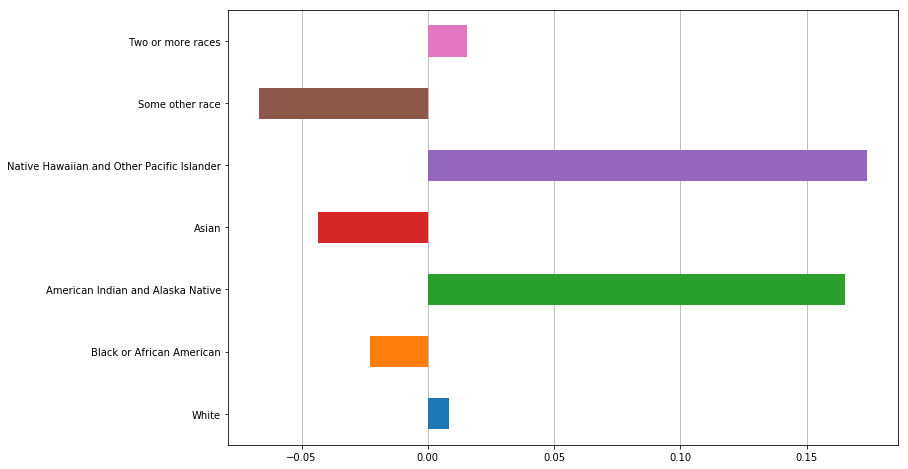

In [422]:
ax = electoral_votes_comparison["ratio"].plot.barh(ylim=[-0.1,0.2])
ax.set_axisbelow(True)
ax.xaxis.grid()